In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/GOOG_train.csv")

In [3]:
test = pd.read_csv("/content/drive/MyDrive/GOOG_test.csv")

In [4]:
test.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,2702.674255,2730.161156,2672.508566,2700.858899,2700.858899,1.303822e+06
std,207.658815,202.614255,208.531935,205.434607,205.434607,5.369361e+05
min,2102.840088,2127.899902,2044.160034,2116.790039,2116.790039,5.933000e+05
25%,2596.669922,2618.074951,2550.070068,2584.800049,2584.800049,9.462000e+05
50%,2742.194092,2767.989990,2714.000000,2740.090088,2740.090088,1.182100e+06
75%,2864.020020,2885.959961,2834.699951,2856.060059,2856.060059,1.512400e+06
max,3037.270020,3042.000000,2997.750000,3014.179932,3014.179932,4.487500e+06


In [163]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1253,2021-06-03,2395.020020,2409.745117,2382.830078,2404.610107,2404.610107,917300
1254,2021-06-04,2422.520020,2453.858887,2417.770020,2451.760010,2451.760010,1297400
1255,2021-06-07,2451.320068,2468.000000,2441.072998,2466.090088,2466.090088,1192500
1256,2021-06-08,2479.899902,2494.495117,2468.239990,2482.850098,2482.850098,1253000
1257,2021-06-09,2499.500000,2505.000000,2487.330078,2491.399902,2491.399902,1006300


In [5]:
df = list(df["Close"])
test = list(test["Close"])

In [6]:
df.extend(test)
len(df)

1511

**Stationarity**\
Subtract the previous value from the current value. Now if we just difference once, we might not get a stationary series so we might need to do that multiple
times.
And the minimum number of differencing operations needed to make the series stationary needs to be imputed into our ARIMA model.

**ADF test**\
We'll use the Augumented Dickey Fuller (ADF) test to check if the price series is stationary.
The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then we can
reject the null hypothesis and infer that the time series is indeed stationary.
So, in our case, if the p-value > 0.05 we'll need to find the order of differencing.

In [7]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df)
print("ADF Statistics:", result[0])
print("p Value", result[1])

ADF Statistics: -0.6136582483986682
p Value 0.8678658599134335


In [6]:
# Now to make data Stationary we subtract previous value from current till we get p < 0.05 
# To find out how many times we need to repeat the above step we use pmdarima
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from pmdarima.arima.utils import ndiffs

In [10]:
d_value = ndiffs(df,test = "adf")
print("d value:", d_value)

d value: 1


**Р-Term**\
p is the order of the Auto Regressive (AR) term. It refers to the number of lags to be used as predictors.
We can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.
The partial autocorrelation represents the correlation between the series and its lags.

In [11]:
from statsmodels.tsa.arima.model import ARIMA

In [12]:
from pmdarima import auto_arima

In [13]:
x_train= df[:-253]
x_test = df[-253:]
print(len(x_train),len(x_test))

1258 253


In [14]:
step_fit = auto_arima(df,trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14347.096, Time=2.01 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14353.081, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14344.966, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14345.393, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14353.185, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=14346.190, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14344.779, Time=1.33 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14346.779, Time=1.39 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14346.779, Time=1.62 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=14346.728, Time=0.57 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=14345.148, Time=0.26 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 7.949 seconds


In [15]:
import statsmodels.api as sm

In [23]:
model = sm.tsa.arima.ARIMA(df, order=(1,1,1))

In [24]:
result = model.fit()
print(step_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1511
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -7168.390
Date:                Thu, 21 Jul 2022   AIC                          14344.779
Time:                        09:47:07   BIC                          14366.059
Sample:                             0   HQIC                         14352.704
                               - 1511                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.5704      1.044      1.504      0.133      -0.476       3.617
ar.L1         -0.4993      0.135     -3.690      0.000      -0.764      -0.234
ma.L1          0.4209      0.140      2.997      0.0

In [25]:
from statsmodels.graphics.tsaplots import plot_predict

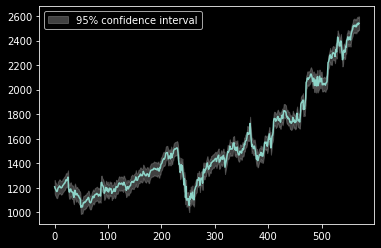

In [26]:
plot_predict(result, start = 700, end = 1270, dynamic = False);

In [32]:
#Now lets Forecast
start = len(x_train)
end= len(x_train) + len(x_test) - 1
fc = result.predict(start=start,end=end)

In [33]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
sqrt(mean_squared_error(x_test,fc))

47.35160303130853

In [34]:
r2_score(x_test,fc)

0.9466613348553223

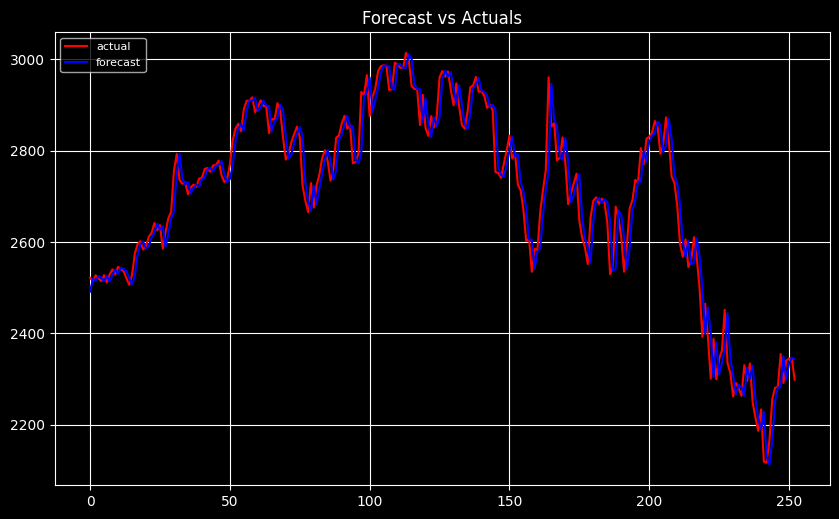

In [35]:
#Plotting 
plt.figure(figsize=(10,6), dpi=100)
plt.style.use("dark_background")

#plt.plot(x_train, label='training', color = "green")
plt.plot(x_test,label='actual', color = "red")
plt.plot(fc , label='forecast', color = "blue")
plt.title('Forecast vs Actuals')

plt.legend(loc='upper left', fontsize=8)
plt.grid()
plt.show()